In [18]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
import numpy, scipy.spatial.distance as dist
%matplotlib inline

## 1. Crea una caja en 2d de tamaño 1000 con las siguientes distribuciones:
a) puntos en una malla cuadriculada de distancia (10x10 cada retícula)

b) 1000 puntos sobre un disco de radio 300

c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

#### a) Malla cuadriculada de 1000x1000 (10x10 cada retícula)

Definimos una función que haga una malla del tamaño que le indique el usuario en la cual hacemos 2 ciclos for, uno para acomodar los puntos en "x" cada "ret" unidades y el otro para acomodar los puntos en "y" cada "ret" unidades. 

In [3]:
def malla_cuad (tamaño,ret): 
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    for i in range(int(tamaño/ret)): 
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret #acomoda los puntos en y
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    return np.loadtxt('Tabla_Datos_malla.dat') 

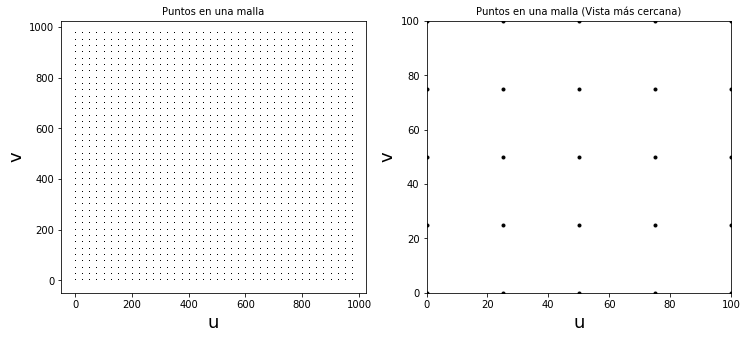

In [4]:
Dt_1=[]
Dt_1 = malla_cuad(1000,25) #hacemos una malla de tamaño 1000x1000 (10x10 cada reticula)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Puntos en una malla',fontsize=10)
plt.plot(Dt_1[:,0],Dt_1[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.subplot(1,2,2)
plt.title('Puntos en una malla (Vista más cercana)',fontsize=10)
plt.plot(Dt_1[:,0],Dt_1[:,1],'k.')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

#### b) 1000 puntos sobre un disco de radio 300

In [5]:
def disco_random (rad,puntos):
    D = []
    D = open('Tabla_Datos_disco.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(0,rad**2,1),0.5) #Radio aleatorio tomando en cuenta el jacobiano.
        th = random.random()*2*math.pi #valor de theta aleatorio, 
        x = r*math.cos(th) # usando la ecuación parametrica del círculo 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y)) 
    D.close()
    return np.loadtxt('Tabla_Datos_disco.dat')

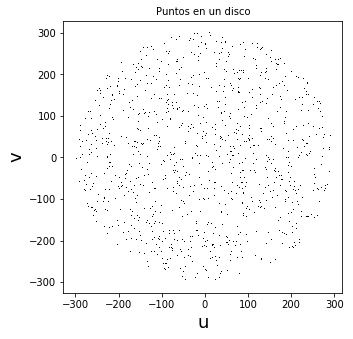

In [6]:
Dt_2 = disco_random(300,1000)

plt.figure(figsize=(5,5))
plt.title('Puntos en un disco',fontsize=10)
plt.plot(Dt_2[:,0],Dt_2[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

#### c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

In [7]:
def anillo_random(rad_ex,rad_in,puntos):
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

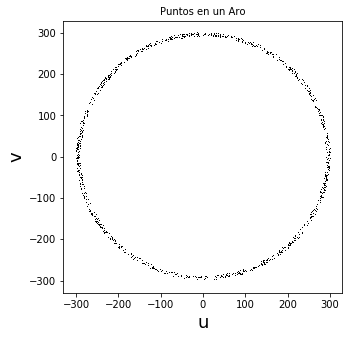

In [8]:
Dt_3 = anillo_random(300,290,1000) # Anillo de radio interno 290 y radio externo 300 con 1000 puntos

plt.figure(figsize=(5,5))
plt.title('Puntos en un Aro',fontsize=10)
plt.plot(Dt_3[:,0],Dt_3[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

#### d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

In [9]:
# d) 50 anillos con 100 puntos aleatorios cada uno cuyos centros están distribuidos aleatoriamente sobre la caja
def anillos_randoms_2(num_anillos, rad_in,rad_ext, puntos, tam_caja):
     
    D_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(num_anillos):
        r_x0 = random.randrange(0,tam_caja,1) # coordenada x donde se ubicará el anillo
        r_y0 = random.randrange(0,tam_caja,1) # coordenada y donde se ubicará el anillo
        
        for j in range(puntos):
            r = pow(random.randrange(rad_in**2,rad_ext**2,1),0.5)
            th = random.random()*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                D_5.write("%f  \t%f \n" % (x,y))
    D_5.close()
    
    return np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')

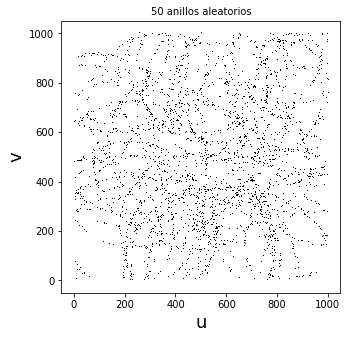

In [10]:
Dt_5 = anillos_randoms_2(50,290,300,100,1000)
plt.figure(figsize=(5,5))
plt.title('50 anillos aleatorios',fontsize=10)
plt.plot(Dt_5[:,0],Dt_5[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

## 2. Haz un algoritmo que calcule la función de correlación con DD/RR-1 con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de bin, y observa qué ocurre.

## Estimator of Peebles-Hauser


Definimos una función para construir una caja de 2 dimenciones de tamaño definido con una distribución de puntos aleatorios (R)

In [11]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

Defino una función para calcular la distancia entre 2 dos puntos.

def dis_NN(m):
    Dis = dist.squareform(dist.pdist(m, "euclidean"))
    return Dis.reshape(-1)

In [103]:
def dis_NN(m):
    a = []
    b = []
    for i in range(len(m)):
        a.append(m[:,0]-m[:,0][i])
        b.append(m[:,1]-m[:,1][i])
    dis = np.sqrt(np.power(a,2)+np.power(b,2))
    return dis.reshape(-1)

Definimos una función para hacer el histograma

In [14]:
def Histo_dist (Dist,bins_0):
    frec, b = np.histogram(Dist, bins = bins_0)
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    return frec, b

In [70]:
def Pee_Hau(DD,RR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return ((np.divide(DD,RR))/pow(n,2))-1

#### Para datos aleatorios 

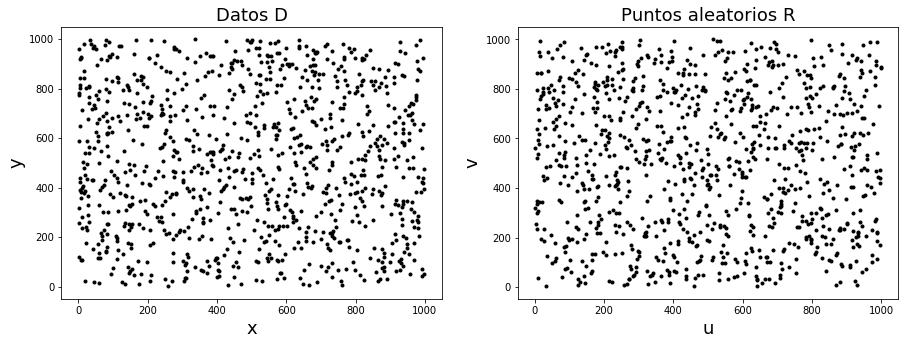

In [114]:
#Creamos 2 cajas de 1000x1000 con puntos aleatorios

#Datos D
dimencion = 1000
puntos = 1000
Dt_al = caja_Rand(dimencion,puntos) #hacemos la caja

#Puntos aleatorios R
dimencion = 1000
puntos = len(Dt_al) 
Rt_al = caja_Rand(dimencion,puntos) #hacemos la caja

#Graficamos:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Datos D',fontsize=18)
plt.plot(Dt_al[:,0],Dt_al[:,1],'k.') # u = RR_1[:,0] | v = RR_1[:,1]
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.subplot(1,2,2)
plt.title('Puntos aleatorios R',fontsize=18)
plt.plot(Rt_al[:,0],Rt_al[:,1],'k.') # u = RR_1[:,0] | v = RR_1[:,1]
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

Histograma de la distancia de los datos:

<Figure size 432x288 with 0 Axes>

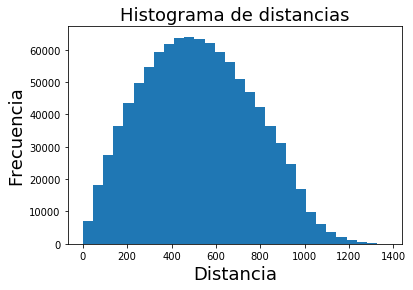

In [115]:
#Hacemos el Histograma
bins_0 = 30
dis_D = dis_NN(Dt_al) #arreglo de distancias de datos
frec_D, bins_D = Histo_dist(dis_D,bins_0)

Histograma de la distancia de los puntos aleatorios:

<Figure size 432x288 with 0 Axes>

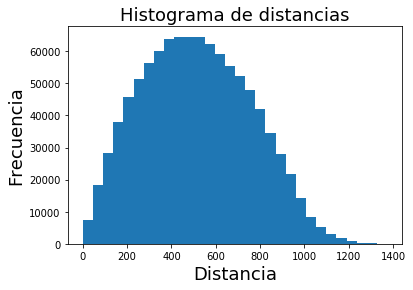

In [116]:
#Hacemos el Histograma
dis_R = dis_NN(Rt_al) #arreglo de distancias de puntos aleatorios
frec_R, bins_R = Histo_dist(dis_R,bins_0) 

Hacemos la función de correlación

In [117]:
FC = Pee_Hau(frec_D,frec_R,len(Dt_al),len(Rt_al)) #calculamos la funcion de correlación

(-1.0, 1.0)

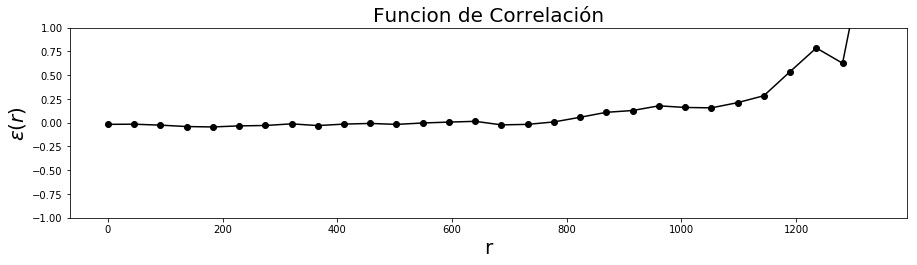

In [118]:
plt.figure(figsize=(15,3.5))
plt.plot(bins_D[:-1],FC,'ko-')
plt.title('Funcion de Correlación',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('$\epsilon (r)$',fontsize=20)
plt.ylim(-1.0, 1.0)

#### Cambiamos el número de puntos (600) y de bin(50)

In [119]:
#Datos D
dimencion = 1000
puntos = 600
Dt_al = caja_Rand(dimencion,puntos) #hacemos la caja

#Puntos aleatorios R
dimencion = 1000
puntos = 600 
Rt_al = caja_Rand(dimencion,puntos) #hacemos la caja

<Figure size 432x288 with 0 Axes>

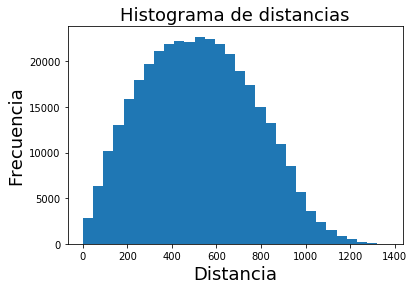

In [120]:
bins_0 = 30
dis_D = dis_NN(Dt_al) #arreglo de distancias de datos
frec_D, bins_D = Histo_dist(dis_D,bins_0)

<Figure size 432x288 with 0 Axes>

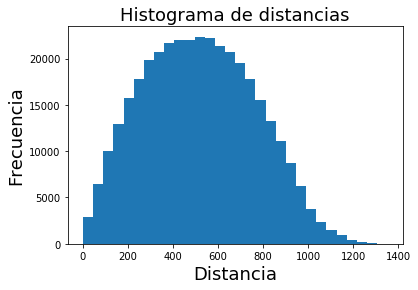

In [121]:
#Hacemos el Histograma
dis_R = dis_NN(Rt_al) #arreglo de distancias de puntos aleatorios
frec_R, bins_R = Histo_dist(dis_R,bins_0) 

In [122]:
FC = Pee_Hau(frec_D,frec_R,len(Dt_al),len(Rt_al)) #calculamos la funcion de correlación

(-1.0, 1.0)

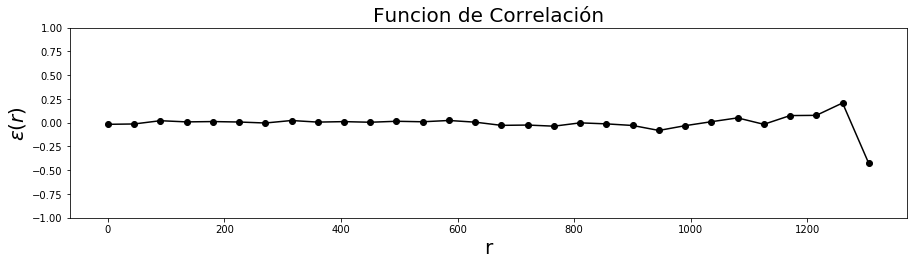

In [123]:
plt.figure(figsize=(15,3.5))
plt.plot(bins_R[:-1],FC,'ko-')
plt.title('Funcion de Correlación',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('$\epsilon (r)$',fontsize=20)
plt.ylim(-1.0, 1.0)

#### Cambiamos el número de puntos (600) y de bin(50)

In [124]:
#Datos D
dimencion = 1000
puntos = 600
Dt_al = caja_Rand(dimencion,puntos) #hacemos la caja

#Puntos aleatorios R
dimencion = 1000
puntos = 600 
Rt_al = caja_Rand(dimencion,puntos) #hacemos la caja

<Figure size 432x288 with 0 Axes>

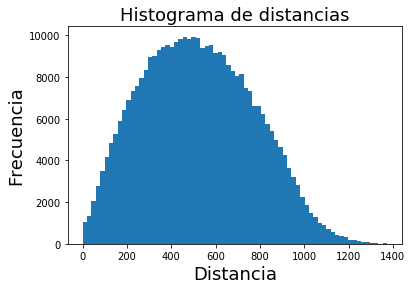

In [125]:
bins_0 = 70
dis_D = dis_NN(Dt_al) #arreglo de distancias de datos
frec_D, bins_D = Histo_dist(dis_D,bins_0)

<Figure size 432x288 with 0 Axes>

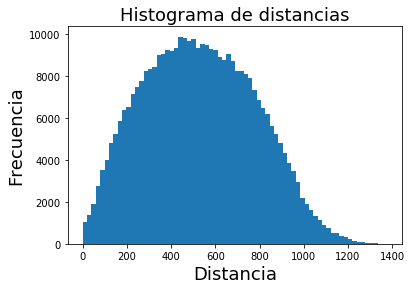

In [126]:
#Hacemos el Histograma
dis_R = dis_NN(Rt_al) #arreglo de distancias de puntos aleatorios
frec_R, bins_R = Histo_dist(dis_R,bins_0) 

In [127]:
FC = Pee_Hau(frec_D,frec_R,len(Dt_al),len(Rt_al)) #calculamos la funcion de correlación

(-1.0, 1.0)

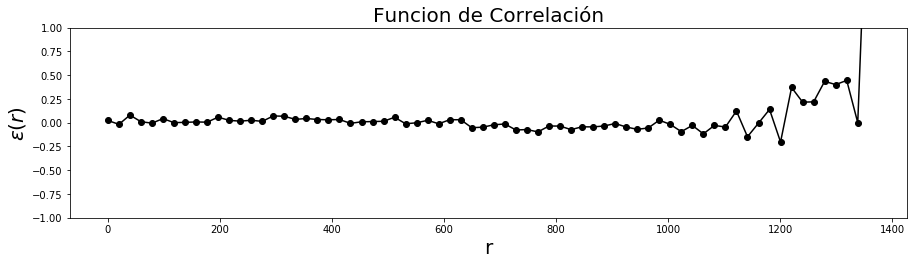

In [128]:
plt.figure(figsize=(15,3.5))
plt.plot(bins_R[:-1],FC,'ko-')
plt.title('Funcion de Correlación',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('$\epsilon (r)$',fontsize=20)
plt.ylim(-1.0, 1.0)